In [ ]:
# dataset "dielectric_constant" is used to predict the average of the eigenvalues of the electronic contribution to the dielectric tensor from all the other inputs
# dataset is imported from matminer

In [3]:
#install matmier library
!pip install matminer

You should consider upgrading via the '/Users/meow/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [8]:
from matminer.datasets.convenience_loaders import load_dielectric_constant
df = load_dielectric_constant()  # loads dataset in a pandas DataFrame object

Fetching dielectric_constant.json.gz from https://ndownloader.figshare.com/files/13213475 to /Users/meow/opt/anaconda3/lib/python3.7/site-packages/matminer/datasets/dielectric_constant.json.gz


Fetching https://ndownloader.figshare.com/files/13213475 in MB: 0.8867839999999999MB [00:00, 109.56MB/s]      


In [9]:
# inspect the dataset
df.head()

,material_id,formula,nsites,space_group,volume,structure,band_gap,e_electronic,e_total,n,poly_electronic,poly_total,pot_ferroelectric
0,mp-441,Rb2Te,3,225,159.501208,"[[1.75725875 1.2425695 3.04366125] Rb, [5.271...",1.88,"[[3.44115795, -3.097e-05, -6.276e-05], [-2.837...","[[6.23414745, -0.00035252, -9.796e-05], [-0.00...",1.86,3.44,6.23,False
1,mp-22881,CdCl2,3,166,84.298097,"[[0. 0. 0.] Cd, [ 4.27210959 2.64061969 13.13...",3.52,"[[3.34688382, -0.04498543, -0.22379197], [-0.0...","[[7.97018673, -0.29423886, -1.463590159999999]...",1.78,3.16,6.73,False
2,mp-28013,MnI2,3,164,108.335875,"[[0. 0. 0.] Mn, [-2.07904300e-06 2.40067320e+...",1.17,"[[5.5430849, -5.28e-06, -2.5030000000000003e-0...","[[13.80606079, 0.0006911900000000001, 9.655e-0...",2.23,4.97,10.64,False
3,mp-567290,LaN,4,186,88.162562,[[-1.73309900e-06 2.38611186e+00 5.95256328e...,1.12,"[[7.09316738, 7.99e-06, -0.0003864700000000000...","[[16.79535386, 8.199999999999997e-07, -0.00948...",2.65,7.04,17.99,False
4,mp-560902,MnF2,6,136,82.826401,"[[1.677294 2.484476 2.484476] Mn, [0. 0. 0.] M...",2.87,"[[2.4239622, 7.452000000000001e-05, 6.06100000...","[[6.44055613, 0.0020446600000000002, 0.0013203...",1.53,2.35,7.12,False


In [10]:
# remove unwanted columns if needed
df.columns
# unwanted_columns = ['xxx']
# df = df.drop(unwanted_columns, axis = 1)
# df.head()

Index(['material_id', 'formula', 'nsites', 'space_group', 'volume',
       'structure', 'band_gap', 'e_electronic', 'e_total', 'n',
       'poly_electronic', 'poly_total', 'pot_ferroelectric'],
      dtype='object')

In [11]:
# inspect the basic statistics of the numerical/categorical columns in the data
df.describe()

,nsites,space_group,volume,band_gap,n,poly_electronic,poly_total
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,7.530303,142.970644,166.420376,2.119432,2.434886,7.248049,14.777898
std,3.388443,67.264591,97.425084,1.604924,1.148849,13.054947,19.435303
min,2.000000,1.000000,13.980548,0.110000,1.280000,1.630000,2.080000
25%,5.000000,82.000000,96.262337,0.890000,1.770000,3.130000,7.557500
50%,8.000000,163.000000,145.944691,1.730000,2.190000,4.790000,10.540000
75%,9.000000,194.000000,212.106405,2.885000,2.730000,7.440000,15.482500
max,20.000000,229.000000,597.341134,8.320000,16.030000,256.840000,277.780000


In [12]:
# representing the chemical compositions as pymaten composition objects
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, "formula")
df.head()

StrToComposition:   0%|          | 0/1056 [00:00<?, ?it/s]

,material_id,formula,nsites,space_group,volume,structure,band_gap,e_electronic,e_total,n,poly_electronic,poly_total,pot_ferroelectric,composition
0,mp-441,Rb2Te,3,225,159.501208,"[[1.75725875 1.2425695 3.04366125] Rb, [5.271...",1.88,"[[3.44115795, -3.097e-05, -6.276e-05], [-2.837...","[[6.23414745, -0.00035252, -9.796e-05], [-0.00...",1.86,3.44,6.23,False,"(Rb, Te)"
1,mp-22881,CdCl2,3,166,84.298097,"[[0. 0. 0.] Cd, [ 4.27210959 2.64061969 13.13...",3.52,"[[3.34688382, -0.04498543, -0.22379197], [-0.0...","[[7.97018673, -0.29423886, -1.463590159999999]...",1.78,3.16,6.73,False,"(Cd, Cl)"
2,mp-28013,MnI2,3,164,108.335875,"[[0. 0. 0.] Mn, [-2.07904300e-06 2.40067320e+...",1.17,"[[5.5430849, -5.28e-06, -2.5030000000000003e-0...","[[13.80606079, 0.0006911900000000001, 9.655e-0...",2.23,4.97,10.64,False,"(Mn, I)"
3,mp-567290,LaN,4,186,88.162562,[[-1.73309900e-06 2.38611186e+00 5.95256328e...,1.12,"[[7.09316738, 7.99e-06, -0.0003864700000000000...","[[16.79535386, 8.199999999999997e-07, -0.00948...",2.65,7.04,17.99,False,"(La, N)"
4,mp-560902,MnF2,6,136,82.826401,"[[1.677294 2.484476 2.484476] Mn, [0. 0. 0.] M...",2.87,"[[2.4239622, 7.452000000000001e-05, 6.06100000...","[[6.44055613, 0.0020446600000000002, 0.0013203...",1.53,2.35,7.12,False,"(Mn, F)"


In [ ]:
# now there is a new composition column at the end

In [13]:
# adding a suite of descriptors to the DataFrame
from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name = "magpie")
df = ep_feat.featurize_dataframe(df, col_id = "composition") # input the "composition" column to the featurizer
df.head()

ElementProperty:   0%|          | 0/1056 [00:00<?, ?it/s]

,material_id,formula,nsites,space_group,volume,structure,band_gap,e_electronic,e_total,n,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,mp-441,Rb2Te,3,225,159.501208,"[[1.75725875 1.2425695 3.04366125] Rb, [5.271...",1.88,"[[3.44115795, -3.097e-05, -6.276e-05], [-2.837...","[[6.23414745, -0.00035252, -9.796e-05], [-0.00...",1.86,...,0.00000,0.000000,0.000000,0.0,152.0,229.0,77.0,203.333333,34.222222,229.0
1,mp-22881,CdCl2,3,166,84.298097,"[[0. 0. 0.] Cd, [ 4.27210959 2.64061969 13.13...",3.52,"[[3.34688382, -0.04498543, -0.22379197], [-0.0...","[[7.97018673, -0.29423886, -1.463590159999999]...",1.78,...,0.00000,0.000000,0.000000,0.0,64.0,194.0,130.0,107.333333,57.777778,64.0
2,mp-28013,MnI2,3,164,108.335875,"[[0. 0. 0.] Mn, [-2.07904300e-06 2.40067320e+...",1.17,"[[5.5430849, -5.28e-06, -2.5030000000000003e-0...","[[13.80606079, 0.0006911900000000001, 9.655e-0...",2.23,...,0.00031,0.000103,0.000138,0.0,64.0,217.0,153.0,115.000000,68.000000,64.0
3,mp-567290,LaN,4,186,88.162562,[[-1.73309900e-06 2.38611186e+00 5.95256328e...,1.12,"[[7.09316738, 7.99e-06, -0.0003864700000000000...","[[16.79535386, 8.199999999999997e-07, -0.00948...",2.65,...,0.00000,0.000000,0.000000,0.0,194.0,194.0,0.0,194.000000,0.000000,194.0
4,mp-560902,MnF2,6,136,82.826401,"[[1.677294 2.484476 2.484476] Mn, [0. 0. 0.] M...",2.87,"[[2.4239622, 7.452000000000001e-05, 6.06100000...","[[6.44055613, 0.0020446600000000002, 0.0013203...",1.53,...,0.00031,0.000103,0.000138,0.0,15.0,217.0,202.0,82.333333,89.777778,15.0


In [ ]:
# successfully generated more features and added to the training data!

In [14]:
# citations
ep_feat.citations()

['@article{ward_agrawal_choudary_wolverton_2016, title={A general-purpose machine learning framework for predicting properties of inorganic materials}, volume={2}, DOI={10.1038/npjcompumats.2017.28}, number={1}, journal={npj Computational Materials}, author={Ward, Logan and Agrawal, Ankit and Choudhary, Alok and Wolverton, Christopher}, year={2016}}']

In [15]:
# adding more composition-based features (oxidation states)
from matminer.featurizers.conversions import CompositionToOxidComposition
from matminer.featurizers.composition import OxidationStates

df = CompositionToOxidComposition().featurize_dataframe(df, "composition")

os_feat = OxidationStates()
df = os_feat.featurize_dataframe(df, "composition_oxid")
df.head()

CompositionToOxidComposition:   0%|          | 0/1056 [00:00<?, ?it/s]

OxidationStates:   0%|          | 0/1056 [00:00<?, ?it/s]

,material_id,formula,nsites,space_group,volume,structure,band_gap,e_electronic,e_total,n,...,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
0,mp-441,Rb2Te,3,225,159.501208,"[[1.75725875 1.2425695 3.04366125] Rb, [5.271...",1.88,"[[3.44115795, -3.097e-05, -6.276e-05], [-2.837...","[[6.23414745, -0.00035252, -9.796e-05], [-0.00...",1.86,...,229.0,77.0,203.333333,34.222222,229.0,"(Rb+, Te2-)",-2,1,3,2.121320
1,mp-22881,CdCl2,3,166,84.298097,"[[0. 0. 0.] Cd, [ 4.27210959 2.64061969 13.13...",3.52,"[[3.34688382, -0.04498543, -0.22379197], [-0.0...","[[7.97018673, -0.29423886, -1.463590159999999]...",1.78,...,194.0,130.0,107.333333,57.777778,64.0,"(Cd2+, Cl-)",-1,2,3,2.121320
2,mp-28013,MnI2,3,164,108.335875,"[[0. 0. 0.] Mn, [-2.07904300e-06 2.40067320e+...",1.17,"[[5.5430849, -5.28e-06, -2.5030000000000003e-0...","[[13.80606079, 0.0006911900000000001, 9.655e-0...",2.23,...,217.0,153.0,115.000000,68.000000,64.0,"(Mn2+, I-)",-1,2,3,2.121320
3,mp-567290,LaN,4,186,88.162562,[[-1.73309900e-06 2.38611186e+00 5.95256328e...,1.12,"[[7.09316738, 7.99e-06, -0.0003864700000000000...","[[16.79535386, 8.199999999999997e-07, -0.00948...",2.65,...,194.0,0.0,194.000000,0.000000,194.0,"(La3+, N3-)",-3,3,6,4.242641
4,mp-560902,MnF2,6,136,82.826401,"[[1.677294 2.484476 2.484476] Mn, [0. 0. 0.] M...",2.87,"[[2.4239622, 7.452000000000001e-05, 6.06100000...","[[6.44055613, 0.0020446600000000002, 0.0013203...",1.53,...,217.0,202.0,82.333333,89.777778,15.0,"(Mn2+, F-)",-1,2,3,2.121320


In [16]:
# adding structural based features (density)
from matminer.featurizers.structure import DensityFeatures

df_feat = DensityFeatures()
df = df_feat.featurize_dataframe(df, "structure")  # input the structure column to the featurizer
df.head()

DensityFeatures:   0%|          | 0/1056 [00:00<?, ?it/s]

,material_id,formula,nsites,space_group,volume,structure,band_gap,e_electronic,e_total,n,...,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
0,mp-441,Rb2Te,3,225,159.501208,"[[1.75725875 1.2425695 3.04366125] Rb, [5.271...",1.88,"[[3.44115795, -3.097e-05, -6.276e-05], [-2.837...","[[6.23414745, -0.00035252, -9.796e-05], [-0.00...",1.86,...,34.222222,229.0,"(Rb+, Te2-)",-2,1,3,2.121320,3.108002,53.167069,0.753707
1,mp-22881,CdCl2,3,166,84.298097,"[[0. 0. 0.] Cd, [ 4.27210959 2.64061969 13.13...",3.52,"[[3.34688382, -0.04498543, -0.22379197], [-0.0...","[[7.97018673, -0.29423886, -1.463590159999999]...",1.78,...,57.777778,64.0,"(Cd2+, Cl-)",-1,2,3,2.121320,3.611055,28.099366,0.284421
2,mp-28013,MnI2,3,164,108.335875,"[[0. 0. 0.] Mn, [-2.07904300e-06 2.40067320e+...",1.17,"[[5.5430849, -5.28e-06, -2.5030000000000003e-0...","[[13.80606079, 0.0006911900000000001, 9.655e-0...",2.23,...,68.000000,64.0,"(Mn2+, I-)",-1,2,3,2.121320,4.732379,36.111958,0.318289
3,mp-567290,LaN,4,186,88.162562,[[-1.73309900e-06 2.38611186e+00 5.95256328e...,1.12,"[[7.09316738, 7.99e-06, -0.0003864700000000000...","[[16.79535386, 8.199999999999997e-07, -0.00948...",2.65,...,0.000000,194.0,"(La3+, N3-)",-3,3,6,4.242641,5.760192,22.040641,0.730689
4,mp-560902,MnF2,6,136,82.826401,"[[1.677294 2.484476 2.484476] Mn, [0. 0. 0.] M...",2.87,"[[2.4239622, 7.452000000000001e-05, 6.06100000...","[[6.44055613, 0.0020446600000000002, 0.0013203...",1.53,...,89.777778,15.0,"(Mn2+, F-)",-1,2,3,2.121320,3.726395,13.804400,0.302832


In [17]:
df_feat.feature_labels()

['density', 'vpa', 'packing fraction']

In [ ]:
# now the features are ready, we can start using machine learning!

In [19]:
# from the features, "poly_electronic" is chosne to be the output and the rest are inputs

Index(['material_id', 'formula', 'nsites', 'space_group', 'volume',
       'structure', 'band_gap', 'e_electronic', 'e_total', 'n',
       ...
       'MagpieData avg_dev SpaceGroupNumber',
       'MagpieData mode SpaceGroupNumber', 'composition_oxid',
       'minimum oxidation state', 'maximum oxidation state',
       'range oxidation state', 'std_dev oxidation state', 'density', 'vpa',
       'packing fraction'],
      dtype='object', length=154)

In [28]:
# drop itself, non-numerical columns and columns related to 'poly_electronic'
y = df['poly_electronic'].values
excluded = ['poly_total', 'material_id', 'formula', 'composition', 'pot_ferroelectric', 'structure', 'poly_electronic', 'composition_oxid', 'e_electronic', 'e_total']
X = df.drop(excluded, axis = 1)
print("There are {} possible descriptors:\n\n{}".format(X.shape[1], X.columns.values))

There are 144 possible descriptors:

['nsites' 'space_group' 'volume' 'band_gap' 'n'
 'MagpieData minimum Number' 'MagpieData maximum Number'
 'MagpieData range Number' 'MagpieData mean Number'
 'MagpieData avg_dev Number' 'MagpieData mode Number'
 'MagpieData minimum MendeleevNumber' 'MagpieData maximum MendeleevNumber'
 'MagpieData range MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData avg_dev MendeleevNumber' 'MagpieData mode MendeleevNumber'
 'MagpieData minimum AtomicWeight' 'MagpieData maximum AtomicWeight'
 'MagpieData range AtomicWeight' 'MagpieData mean AtomicWeight'
 'MagpieData avg_dev AtomicWeight' 'MagpieData mode AtomicWeight'
 'MagpieData minimum MeltingT' 'MagpieData maximum MeltingT'
 'MagpieData range MeltingT' 'MagpieData mean MeltingT'
 'MagpieData avg_dev MeltingT' 'MagpieData mode MeltingT'
 'MagpieData minimum Column' 'MagpieData maximum Column'
 'MagpieData range Column' 'MagpieData mean Column'
 'MagpieData avg_dev Column' 'MagpieData mode Column

In [29]:
# trying linear regression model as a start
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lr = LinearRegression()

lr.fit(X, y)

LinearRegression()

In [30]:
# get fit statistics
print('training R2 = ' + str(round(lr.score(X, y), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=lr.predict(X))))

training R2 = 0.934
training RMSE = 3.341


In [31]:
# to validate over-fitting or not, checking the cross-validation score
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]
r2_scores = cross_val_score(lr, X, y, scoring='r2', cv=crossvalidation, n_jobs=1)


print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores), np.mean(np.abs(r2_scores))))
print('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean R2: 319990093.129
Folds: 10, mean RMSE: 79106.993


In [ ]:
# THIS IS BIZARRE!

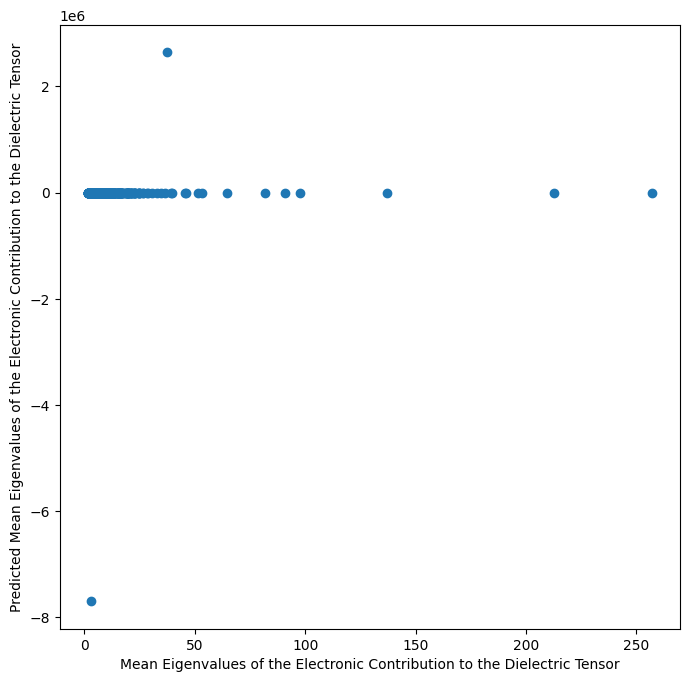

In [32]:
# visualize the linear regression model results
from sklearn.model_selection import cross_val_predict 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=100)

plt.scatter(y,cross_val_predict(lr, X, y, cv=crossvalidation))
plt.xlabel("Mean Eigenvalues of the Electronic Contribution to the Dielectric Tensor");
plt.ylabel("Predicted Mean Eigenvalues of the Electronic Contribution to the Dielectric Tensor");

In [ ]:
# TERRIBLE!!

In [33]:
# trying random forest regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=1)

rf.fit(X, y)
print('training R2 = ' + str(round(rf.score(X, y), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=rf.predict(X))))

training R2 = 0.986
training RMSE = 1.528


In [37]:
# compute cross validation scores for random forest model
r2_scores = cross_val_score(rf, X, y, scoring='r2', cv=crossvalidation, n_jobs=-1)
scores = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=-1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores), np.mean(np.abs(r2_scores))))
print('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean R2: 0.954
Folds: 10, mean RMSE: 2.629


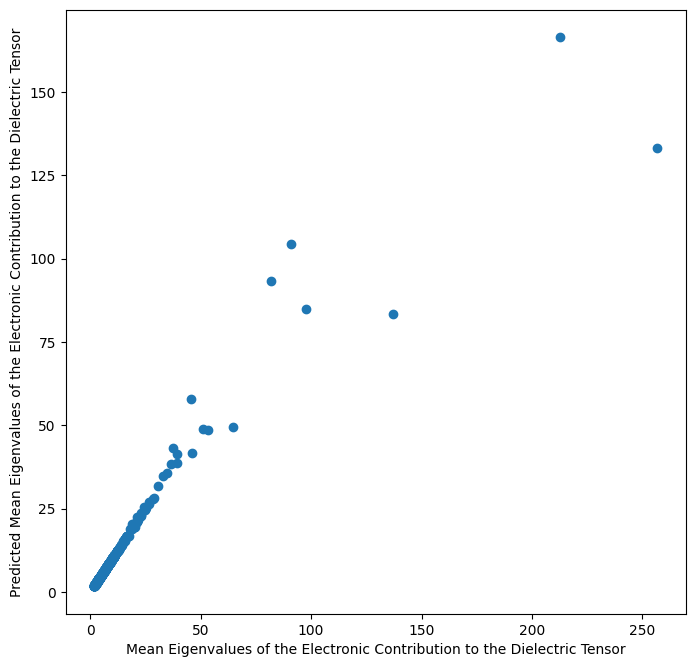

In [39]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=100)

plt.scatter(y,cross_val_predict(rf, X, y, cv=crossvalidation))
plt.xlabel("Mean Eigenvalues of the Electronic Contribution to the Dielectric Tensor");
plt.ylabel("Predicted Mean Eigenvalues of the Electronic Contribution to the Dielectric Tensor");

In [ ]:
# OMG this is much better!

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

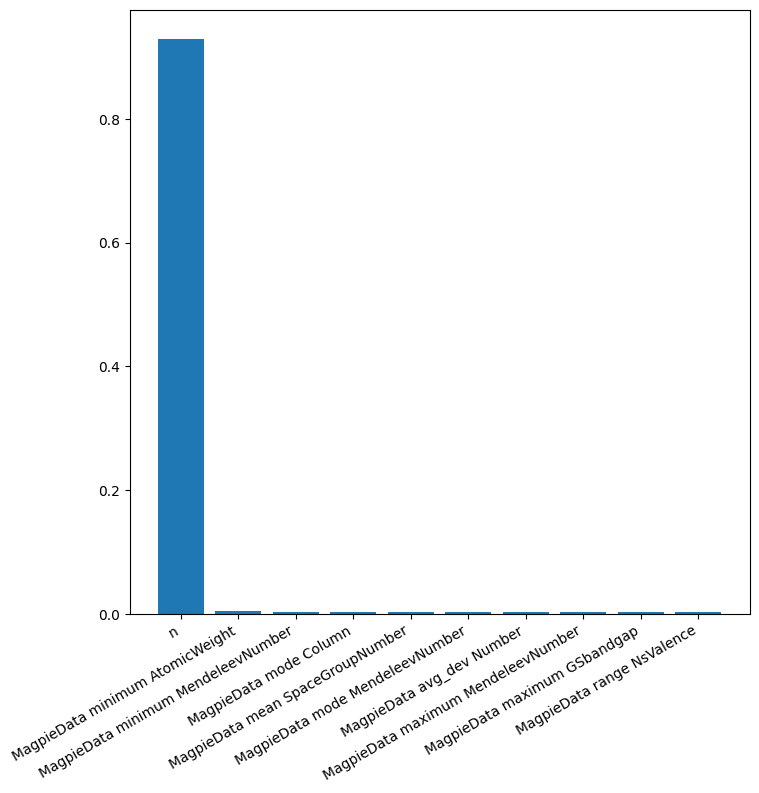

In [40]:
# predicted the most important features used by the random forest model
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=100)

importances = rf.feature_importances_
included = X.columns.values
indices = np.argsort(importances)[::-1]
plt.bar(included[indices][0:10], importances[indices][0:10])
plt.xticks(rotation=30, ha='right')

In [ ]:
# n is Refractive Index, which makes sense.